In [106]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

### 梯度下降原理与学习率

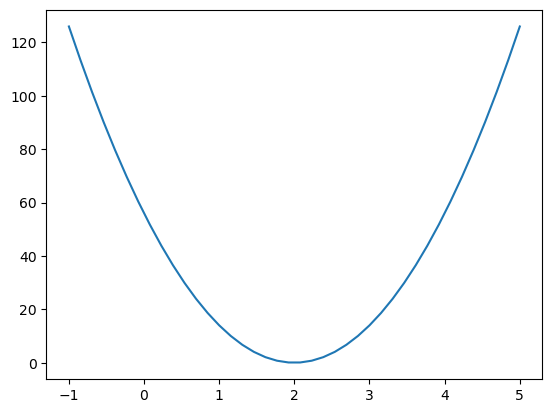

In [107]:
x = np.linspace(-1, 5, 40)
SSELoss_ = 14 * np.power(x - 2, 2)
plt.plot(x, SSELoss_)

$$\nabla _wf(w) = \frac{\partial f}{\partial w}=28(w-2)$$

In [108]:
def gd(lr = 0.02, itera_times = 20, w = 10):
    """
    梯度下降计算函数
    :param lr: 学习率
    :param itera_times：迭代次数
    :param w：参数初始取值
    :return results：每一轮迭代的参数计算结果列表
    """
    results = [w]
    for i in range(itera_times):
        w -= lr * 28 * (w - 2)  # 梯度计算公式
        results.append(w)
    return results

In [109]:
res = gd()
res

[10,
 5.52,
 3.5488,
 2.681472,
 2.29984768,
 2.1319329792,
 2.058050510848,
 2.02554222477312,
 2.0112385789001728,
 2.004944974716076,
 2.0021757888750735,
 2.0009573471050324,
 2.000421232726214,
 2.000185342399534,
 2.000081550655795,
 2.00003588228855,
 2.000015788206962,
 2.0000069468110633,
 2.000003056596868,
 2.000001344902622,
 2.000000591757154]

In [110]:
def show_trace(res):
    """
    梯度下降轨迹绘制函数
    """
    f_line = np.arange(-6, 10, 0.1)
    plt.plot(f_line, [14 * np.power(x-2, 2) for x in f_line])
    plt.plot(res, [14 * np.power(x-2, 2) for x in res], '-o')
    plt.xlabel('x')
    plt.ylabel('Loss(x)')

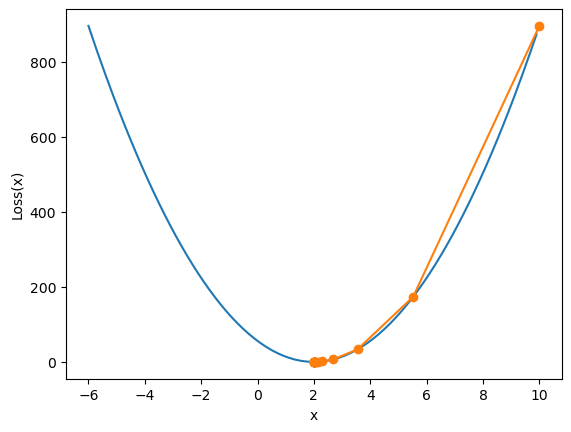

In [111]:
show_trace(res)

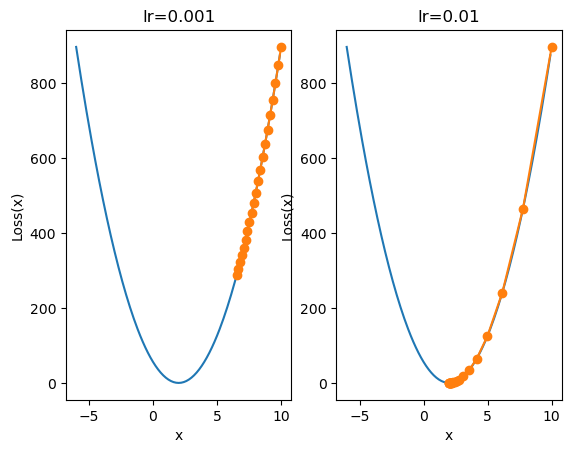

In [112]:
# 学习率对比
plt.subplot(121)
plt.title('lr=0.001')
show_trace(gd(lr=0.001))
plt.subplot(122)
plt.title('lr=0.01')
show_trace(gd(lr=0.01))

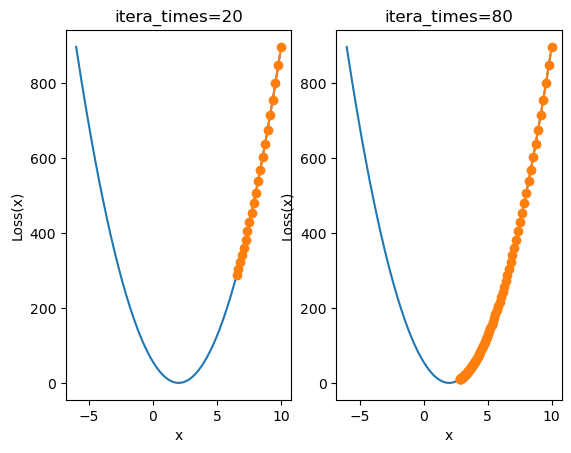

In [113]:
# 增加迭代次数
plt.subplot(121)
plt.title('itera_times=20')
show_trace(gd(itera_times=20, lr=0.001))
plt.subplot(122)
plt.title('itera_times=80')
show_trace(gd(itera_times=80, lr=0.001))

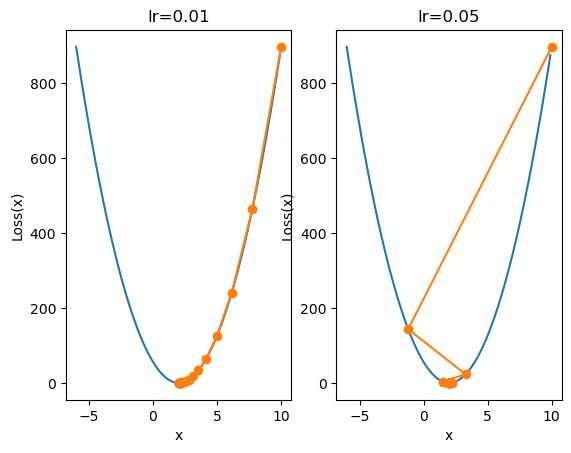

In [114]:
plt.subplot(121)
plt.title('lr=0.01')
show_trace(gd(lr=0.01))
plt.subplot(122)
plt.title('lr=0.05')
show_trace(gd(lr=0.05))

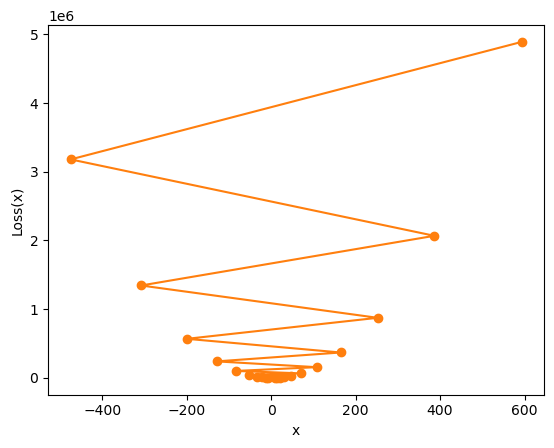

In [115]:
show_trace(gd(lr=0.08))

In [116]:
gd(lr=0.08)

[10,
 -7.920000000000002,
 14.300800000000006,
 -13.25299200000001,
 20.913710080000012,
 -21.45300049920002,
 31.081720619008028,
 -34.06133356756996,
 46.71605362378676,
 -53.447906493495594,
 70.75540405193455,
 -83.25670102439885,
 107.71830927025458,
 -129.0907034951157,
 164.55247233394346,
 -199.56506569408992,
 251.94068146067156,
 -307.92644501123283,
 386.30879181392874,
 -474.5429018492717,
 592.9131982930971]

### 梯度下降计算流程

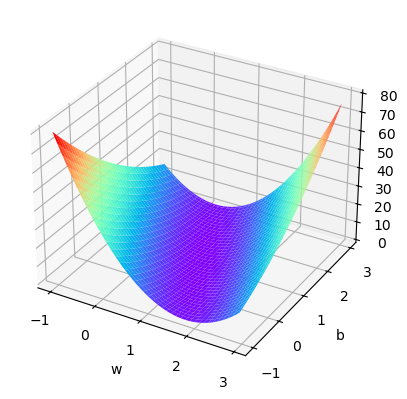

In [117]:
# SSELoss
x = np.arange(-1,3,0.05)
y = np.arange(-1,3,0.05)
w, b = np.meshgrid(x, y)
SSE = (2 - w - b) ** 2 + (4 - 3 * w - b) ** 2

ax = plt.axes(projection='3d')

ax.plot_surface(w, b, SSE, cmap='rainbow')
plt.xlabel('w')
plt.ylabel('b')
plt.show()

In [118]:
np.random.seed(24)
w = np.random.randn(2, 1) # 参数都默认为列向量
w

array([[ 1.32921217],
       [-0.77003345]])

In [119]:
def MSELoss(X, w, y):
    """
    MSE指标计算函数
    """
    SSE = SSELoss(X, w, y)
    MSE = SSE / X.shape[0]
    return MSE

In [120]:
features = np.array([1, 3]).reshape(-1, 1)
features = np.concatenate((features, np.ones_like(features)), axis=1)
features

array([[1, 1],
       [3, 1]])

In [121]:
labels = np.array([2, 4]).reshape(-1, 1)
labels

array([[2],
       [4]])

In [122]:
# 计算w取值时SSE
SSELoss(features, w, labels)

# 计算w取值时MSE
MSELoss(features, w, labels)

array([[1.34405546]])

In [123]:
def lr_gd(X, w, y):
    """
    线性回归梯度计算公式（）
    """
    m = X.shape[0]
    # grad = 2 * X.T.dot((X.dot(w) - y)) # SSE
    grad = 2 * X.T.dot((X.dot(w) - y)) / m # MSE
    return grad

In [124]:
# 计算w取值时梯度
lr_gd(features, w, labels)

array([[-3.78801208],
       [-2.22321821]])

In [125]:
def w_cal(X, w, y, gd_cal, lr = 0.02, itera_times = 20):
    """
    梯度下降中参数更新函数 
    :param X: 训练数据特征
    :param w: 初始参数取值
    :param y: 训练数据标签
    :param gd_cal：梯度计算公式
    :param lr: 学习率
    :param itera_times: 迭代次数       
    :return w：最终参数计算结果   
    """
    for i in range(itera_times):
        w -= lr * gd_cal(X, w, y)
    return w

In [126]:
# 梯度下降计算，在学习率为0.1的情况下迭代100轮
w = w_cal(features, w, labels, gd_cal = lr_gd, lr = 0.1, itera_times = 100)
w

array([[1.02052278],
       [0.95045363]])

In [127]:
# 计算w取值时SSE
SSELoss(features, w, labels)

array([[0.0009869]])

In [128]:
# 计算w取值时MSE
MSELoss(features, w, labels)

array([[0.00049345]])

In [129]:
# 计算w取值时梯度
lr_gd(features, w, labels)

array([[ 0.0070423 ],
       [-0.01700163]])

### 二维梯度下降可视化

#### 等高线图

In [130]:
def w_cal_rec(X, w, y, gd_cal, lr = 0.02, itera_times = 20):
    w_res = [np.copy(w)]
    for i in range(itera_times):
        w -= lr * gd_cal(X, w, y)
        w_res.append(np.copy(w))
    return w, w_res

In [131]:
np.random.seed(24)
w = np.random.randn(2, 1)
w, w_res = w_cal_rec(features, w, labels, gd_cal = lr_gd, lr = 0.1, itera_times = 100)
w_res

[array([[ 1.32921217],
        [-0.77003345]]),
 array([[ 1.70801338],
        [-0.54771163]]),
 array([[ 1.61908465],
        [-0.52137466]]),
 array([[ 1.60854986],
        [-0.46473359]]),
 array([[ 1.58589343],
        [-0.41520681]]),
 array([[ 1.56608273],
        [-0.36652283]]),
 array([[ 1.54660913],
        [-0.31965135]]),
 array([[ 1.52786054],
        [-0.27436473]]),
 array([[ 1.50974589],
        [-0.230636  ]]),
 array([[ 1.4922544 ],
        [-0.18840716]]),
 array([[ 1.47536286],
        [-0.14762749]]),
 array([[ 1.45905099],
        [-0.10824714]]),
 array([[ 1.44329885],
        [-0.07021811]]),
 array([[ 1.42808724],
        [-0.03349403]]),
 array([[1.41339761],
        [0.00196988]]),
 array([[1.39921205],
        [0.03621686]]),
 array([[1.38551326],
        [0.06928867]]),
 array([[1.37228453],
        [0.10122563]]),
 array([[1.35950975],
        [0.13206669]]),
 array([[1.34717332],
        [0.16184946]]),
 array([[1.33526022],
        [0.19061024]]),
 array

In [132]:
# 所有点的横坐标
np.array(w_res)[:,0]

array([[1.32921217],
       [1.70801338],
       [1.61908465],
       [1.60854986],
       [1.58589343],
       [1.56608273],
       [1.54660913],
       [1.52786054],
       [1.50974589],
       [1.4922544 ],
       [1.47536286],
       [1.45905099],
       [1.44329885],
       [1.42808724],
       [1.41339761],
       [1.39921205],
       [1.38551326],
       [1.37228453],
       [1.35950975],
       [1.34717332],
       [1.33526022],
       [1.32375591],
       [1.31264636],
       [1.30191803],
       [1.29155784],
       [1.28155316],
       [1.27189178],
       [1.26256193],
       [1.25355223],
       [1.24485169],
       [1.23644971],
       [1.22833604],
       [1.22050079],
       [1.2129344 ],
       [1.20562764],
       [1.19857162],
       [1.19175772],
       [1.18517763],
       [1.17882334],
       [1.17268709],
       [1.16676141],
       [1.16103906],
       [1.15551307],
       [1.15017671],
       [1.14502346],
       [1.14004704],
       [1.13524139],
       [1.130

Text(0, 0.5, 'b')

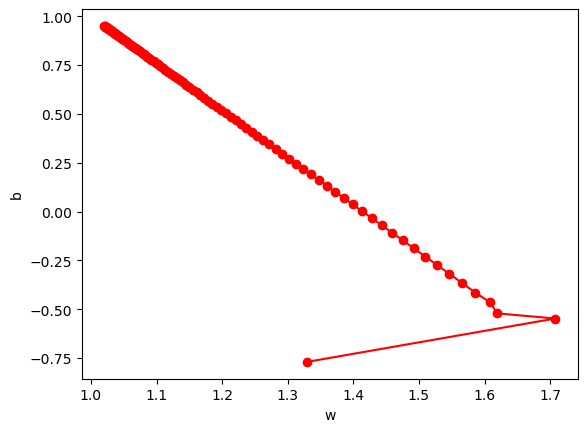

In [133]:
plt.plot(np.array(w_res)[:, 0], np.array(w_res)[:, 1], '-o', color="r")
plt.xlabel('w')
plt.ylabel('b')

In [134]:
# 网格点坐标
x1, x2 = np.meshgrid(np.arange(1, 2, 0.001), np.arange(-1, 1, 0.001))
print(x1)
print(x2)

[[1.    1.001 1.002 ... 1.997 1.998 1.999]
 [1.    1.001 1.002 ... 1.997 1.998 1.999]
 [1.    1.001 1.002 ... 1.997 1.998 1.999]
 ...
 [1.    1.001 1.002 ... 1.997 1.998 1.999]
 [1.    1.001 1.002 ... 1.997 1.998 1.999]
 [1.    1.001 1.002 ... 1.997 1.998 1.999]]
[[-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-0.999 -0.999 -0.999 ... -0.999 -0.999 -0.999]
 [-0.998 -0.998 -0.998 ... -0.998 -0.998 -0.998]
 ...
 [ 0.997  0.997  0.997 ...  0.997  0.997  0.997]
 [ 0.998  0.998  0.998 ...  0.998  0.998  0.998]
 [ 0.999  0.999  0.999 ...  0.999  0.999  0.999]]


Text(0, 0.5, 'b')

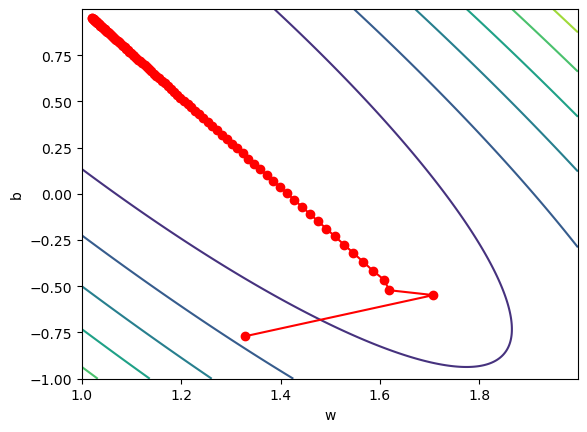

In [135]:
# 绘制等高线图
# SSE = (2 - x1 - x2) ** 2 + (4 - 3 * x1 - x2) ** 2)
plt.contour(x1, x2, (2 - x1 - x2) ** 2 + (4 - 3 * x1 - x2) ** 2)

# 绘制参数点移动轨迹图
plt.plot(np.array(w_res)[:, 0], np.array(w_res)[:, 1], '-o', color='r')
plt.xlabel('w')
plt.ylabel('b')

#### 损失函数变化曲线

In [136]:
loss_value = np.array([MSELoss(features, np.array(w), labels) for w in w_res]).flatten()
loss_value

array([1.34405546e+00, 5.18623852e-01, 4.63471078e-01, 4.31655465e-01,
       4.02524386e-01, 3.75373031e-01, 3.50053485e-01, 3.26441796e-01,
       3.04422755e-01, 2.83888935e-01, 2.64740155e-01, 2.46882992e-01,
       2.30230325e-01, 2.14700907e-01, 2.00218974e-01, 1.86713872e-01,
       1.74119712e-01, 1.62375048e-01, 1.51422581e-01, 1.41208877e-01,
       1.31684104e-01, 1.22801792e-01, 1.14518608e-01, 1.06794137e-01,
       9.95906956e-02, 9.28731379e-02, 8.66086905e-02, 8.07667906e-02,
       7.53189365e-02, 7.02385492e-02, 6.55008424e-02, 6.10827019e-02,
       5.69625722e-02, 5.31203522e-02, 4.95372963e-02, 4.61959234e-02,
       4.30799317e-02, 4.01741188e-02, 3.74643078e-02, 3.49372780e-02,
       3.25807006e-02, 3.03830783e-02, 2.83336892e-02, 2.64225348e-02,
       2.46402910e-02, 2.29782625e-02, 2.14283405e-02, 1.99829634e-02,
       1.86350793e-02, 1.73781123e-02, 1.62059298e-02, 1.51128129e-02,
       1.40934286e-02, 1.31428034e-02, 1.22562995e-02, 1.14295918e-02,
      

Text(0, 0.5, 'Loss')

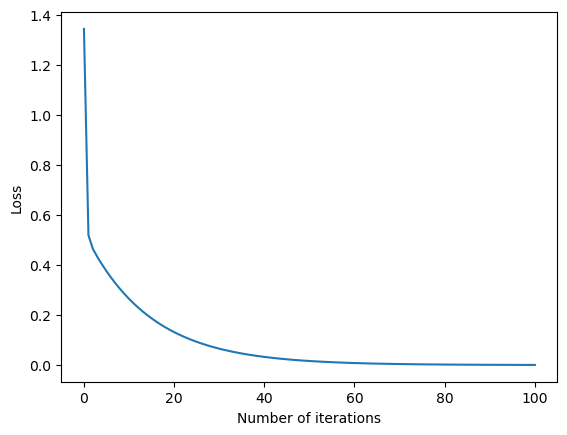

In [137]:
plt.plot(np.arange(101), loss_value)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')

In [138]:
def loss_vis(X, w_res, y, loss_func):
    loss_value = np.array([loss_func(X, np.array(w), y) for w in w_res]).flatten()
    plt.plot(np.arange(len(loss_value)), loss_value)
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')

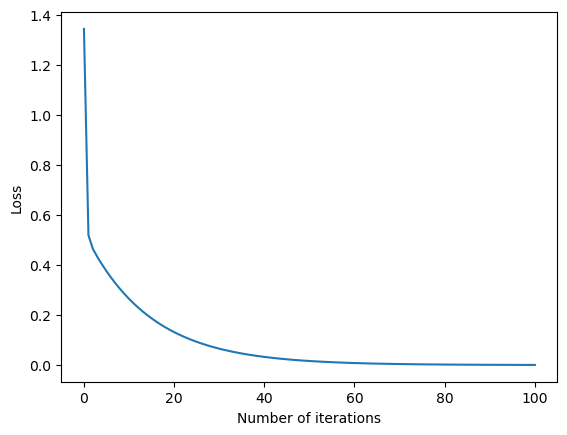

In [139]:
# 验证函数是否可执行
loss_vis(features, w_res, labels, MSELoss)

### 线性回归的梯度下降求解过程

In [140]:
# TO-DO

### 梯度下降算法局限

#### 局部最小值

Text(0, 0.5, 'x·cos(pi·x)')

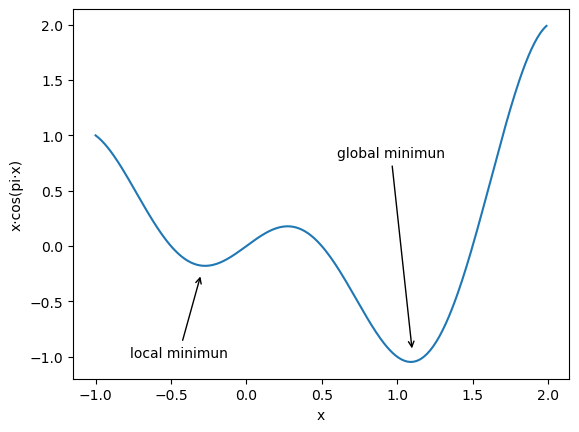

In [141]:
x = np.arange(-1, 2, 0.01)
y = x * np.cos(np.pi * x)

fig = plt.plot(x, y)[0]
fig.axes.annotate('local minimun', xytext=(-0.77, -1),
                arrowprops=dict(arrowstyle='->'), xy=(-0.3, -0.25))
fig.axes.annotate('global minimun', xytext=(0.6, 0.8),
                arrowprops=dict(arrowstyle='->'), xy=(1.1, -0.95))
plt.xlabel('x')
plt.ylabel('x·cos(pi·x)')

In [142]:
def f_1(x):
    return (x*np.cos(np.pi*x))

In [143]:
def f_gd_1(x):
    return (np.cos(np.pi*x)-x*np.pi*(np.sin(np.pi*x)))

In [144]:
def gd_1(lr = 0.02, itera_times = 20, w = -1):
    """
    梯度下降计算函数
    :param lr: 学习率
    :param itera_times：迭代次数
    :param w：参数初始取值
    :return results：每一轮迭代的参数计算结果列表
    """
    results = [w]
    for i in range(itera_times):
        w -= lr * f_gd_1(w) # 梯度计算公式
        results.append(w)
    return results

In [145]:
res = gd_1(itera_times = 5000)
res[-1] #最后一轮的w取值

np.float64(-0.2738526868008511)

In [146]:
def show_trace_1(res):
    """
    梯度下降轨迹绘制函数
    """
    f_line = np.arange(-1, 2, 0.01)
    plt.plot(f_line, [f_1(x) for x in f_line])
    plt.plot(res, [f_1(x) for x in res], '-o')
    plt.xlabel('x')
    plt.ylabel('Loss(x)')

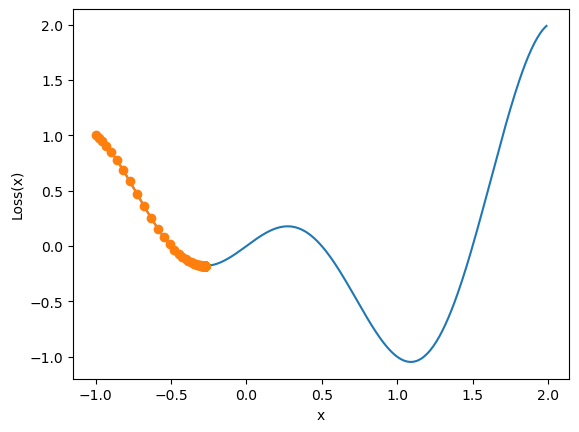

In [147]:
show_trace_1(res)

In [148]:
f_gd_1(res[-1])

np.float64(-1.3322676295501878e-15)

#### 鞍点

Text(0, 0.5, 'x**3')

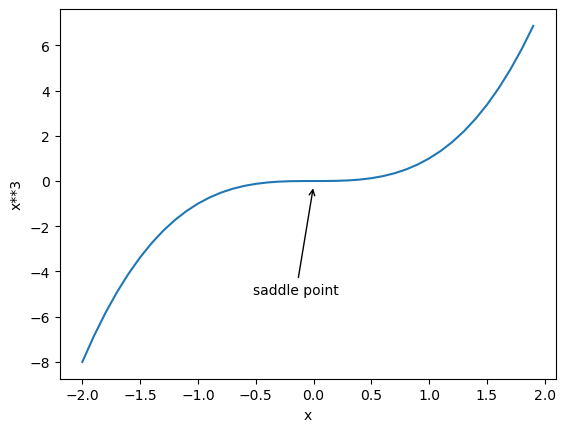

In [149]:
x = np.arange(-2, 2, 0.1)
y = np.power(x, 3)

fig = plt.plot(x, y)[0]
fig.axes.annotate('saddle point', xytext=(-0.52, -5),
                arrowprops=dict(arrowstyle='->'), xy=(0, -0.2))
plt.xlabel('x')
plt.ylabel('x**3')

In [150]:
# x**3函数
def f_2(x):
    return np.power(x, 3)

In [151]:
# x**3导函数
def f_gd_2(x):
    return (3*np.power(x, 2))

In [152]:
# 梯度更新函数
def gd_2(lr = 0.05, itera_times = 200, w = 1):
    """
    梯度下降计算函数
    :param lr: 学习率
    :param itera_times：迭代次数
    :param w：参数初始取值
    :return results：每一轮迭代的参数计算结果列表
    """
    results = [w]
    for i in range(itera_times):
        w -= lr * f_gd_2(w) # 梯度计算公式
        results.append(w)
    return results

In [153]:
res = gd_2(itera_times=5000)
res[-1] #最后一轮的w取值

np.float64(0.0013297766246039373)

In [154]:
def show_trace_2(res):
    """
    梯度下降轨迹绘制函数
    """
    f_line = np.arange(-1, 2, 0.01)
    plt.plot(f_line, [f_2(x) for x in f_line])
    plt.plot(res, [f_2(x) for x in res], '-o')
    plt.xlabel('x')
    plt.ylabel('Loss(x)')

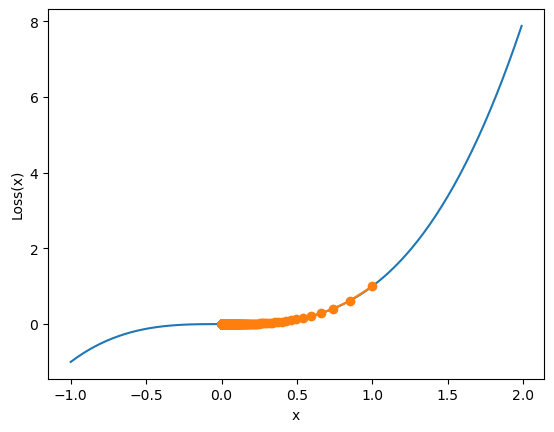

In [155]:
show_trace_2(res)

Text(0.5, 0.5, 'y')

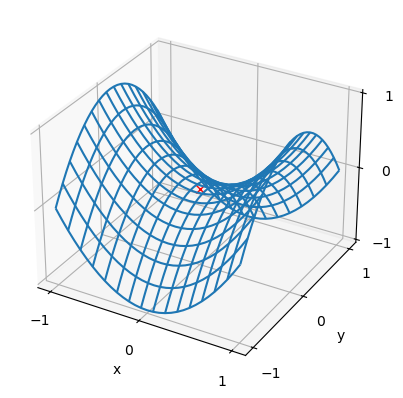

In [156]:
x, y = np.mgrid[-1:1:31j,-1:1:31j]
z = x**2 - y**2
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z,**{'rstride':2,'cstride':2})
ax.plot([0],[0],[0],'rx')
ticks =[-1,0,1]
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_zticks(ticks)
plt.xlabel('x')
plt.ylabel('y')

### 损失函数相关理论案例

In [157]:
# 创建第一条数据
x1 = np.array([[1]])
y1 = np.array([[2]])
w1 = np.array([[0.]])

# 计算w1当前梯度
print(lr_gd(x1, w1, y1))

# 创建第二条数据
x2 = np.array([[2]])
y2 = np.array([[4]])
w2 = np.array([[0.]])

# 计算w2当前梯度
print(lr_gd(x2, w2, y2))

[[-4.]]
[[-16.]]


In [158]:
# MSELoss1
w_cal_rec(x1, w1, y1, gd_cal = lr_gd, lr = 0.1, itera_times = 10)

(array([[1.78525164]]),
 [array([[0.]]),
  array([[0.4]]),
  array([[0.72]]),
  array([[0.976]]),
  array([[1.1808]]),
  array([[1.34464]]),
  array([[1.475712]]),
  array([[1.5805696]]),
  array([[1.66445568]]),
  array([[1.73156454]]),
  array([[1.78525164]])])

In [159]:
# MSELoss2
w_cal_rec(x2, w2, y2, gd_cal = lr_gd, lr = 0.025, itera_times = 10)

(array([[1.78525164]]),
 [array([[0.]]),
  array([[0.4]]),
  array([[0.72]]),
  array([[0.976]]),
  array([[1.1808]]),
  array([[1.34464]]),
  array([[1.475712]]),
  array([[1.5805696]]),
  array([[1.66445568]]),
  array([[1.73156454]]),
  array([[1.78525164]])])

### 随机梯度下降


#### 计算流程

In [160]:
w = 0
x = np.array([[1], [3]])
y = np.array([[2], [5]])

# 执行第一轮迭代
w = w_cal(x[0], w, y[0], lr_gd, lr = 0.02, itera_times = 1)
print(w)

# 执行第二轮迭代
w = w_cal(x[1], w, y[1], lr_gd, lr = 0.02, itera_times = 1)
print(w)

0.08
0.6512


In [161]:
w = 0
w_cal(x, w, y, lr_gd, lr = 0.02, itera_times = 2)

array([[0.612]])

In [162]:
w = 0
epoch = 20

for j in range(epoch):
    for i in range(2):
        w = w_cal(x[i], w, y[i], lr_gd, lr = 0.02, itera_times = 1)
        print(w)

0.08
0.6512
0.705152
1.05129728
1.0892453888
1.297117048832
1.32523236687872
1.4481487148023808
1.4702227662102856
1.540942570374583
1.5593048675595995
1.5979551152381437
1.6140369106286179
1.6329836228023156
1.6476642778902229
1.6545051378497426
1.668324932335753
1.667727956694882
1.6810188384270868
1.6758520565933355
1.6888179743296021
1.6808435035709453
1.6936097634281075
1.6839102485939887
1.6965538386502292
1.6857944567361467
1.6983626784667007
1.6869521142186885
1.6994740296499409
1.687663378975962
1.7001568438169237
1.6881003800428311
1.7005763648411178
1.6883688734983155
1.7008341185583828
1.688533835877365
1.7009924824422704
1.688635188763053
1.701089781212531
1.6886974599760198


In [163]:
def sgd_cal(X, w, y, gd_cal, epoch, lr = 0.02):
    """
    随机梯度下降计算函数
    :param X: 训练数据特征
    :param w: 初始参数取值
    :param y: 训练数据标签
    :param gd_cal：梯度计算公式
    :param epoch: 遍历数据集次数
    :param lr: 学习率
    :return w：最终参数计算结果
    """
    m = X.shape[0]
    n = X.shape[1]
    for j in range(epoch):
        for i in range(m):
            w = w_cal(X[i].reshape(1, n), w, y[i].reshape(1, 1), gd_cal=gd_cal, lr=lr, itera_times = 1)
    return w

In [164]:
w = 0
sgd_cal(x, w, y, lr_gd, epoch=20, lr=0.02)

array([[1.68869746]])

In [165]:
# 梯度下降计算过程
w = 0
w = w_cal(x, w, y, lr_gd, lr = 0.02, itera_times = 100)
w

array([[1.7]])

#### 算法特性

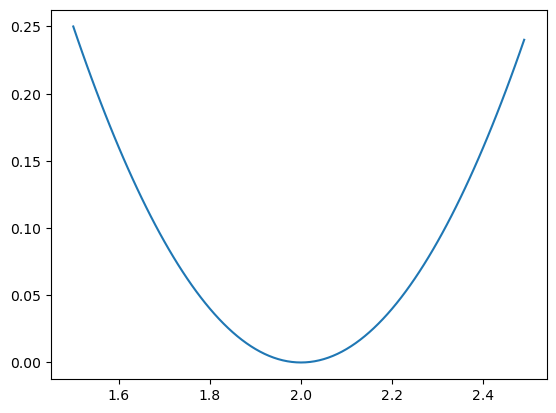

In [166]:
x1 = np.arange(1.5, 2.5, 0.01)
y1 = np.power(2-x1, 2)
plt.plot(x1, y1)

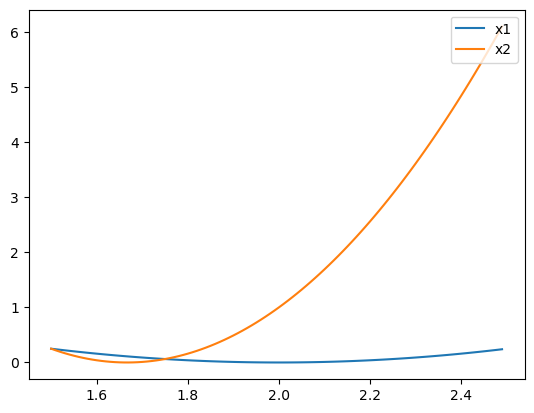

In [167]:
y2 = np.power(5-3*x1, 2)
plt.plot(x1, y1, label='x1')
plt.plot(x1, y2, label='x2')
plt.legend(loc = 1)

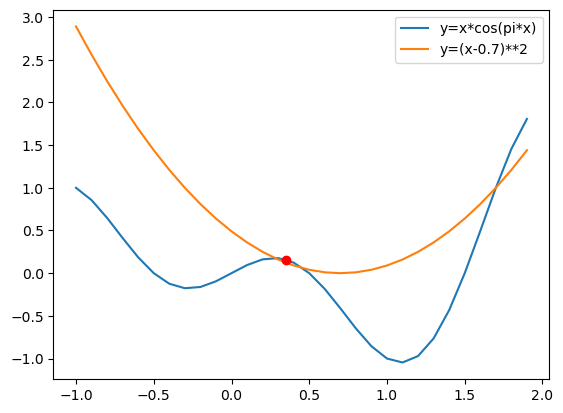

In [168]:
x1 = np.arange(-1, 2, 0.1)
y1 = x1 * np.cos(np.pi * x1)
y2 = np.power(x1-0.7, 2)
plt.plot(x1, y1, label='y=x*cos(pi*x)')
plt.plot(x1, y2, label='y=(x-0.7)**2')
plt.plot([0.35],[0.35 * np.cos(np.pi * 0.35)],'ro')
plt.legend(loc = 1)

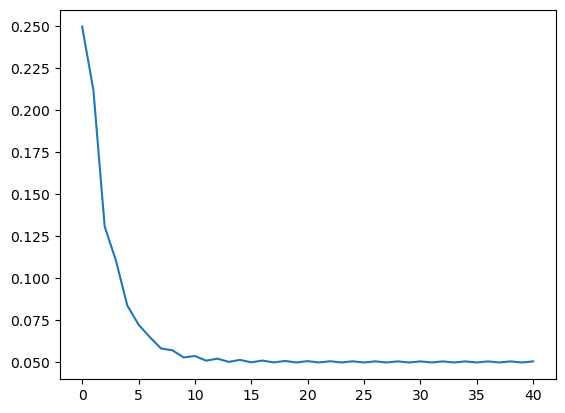

In [169]:
w = 1.5
x = np.array([[1], [3]])
y = np.array([[2], [5]])
epoch = 20
num = x.shape[0]

MSE_l = [MSELoss(x, w, y)]
for j in range(epoch):
    for i in range(num):
        w = w_cal(x[i], w, y[i], lr_gd, lr = 0.02, itera_times = 1)
        MSE_l.append(MSELoss(x, w, y))

plt.plot(list(np.arange(41)), np.array(MSE_l).flatten())

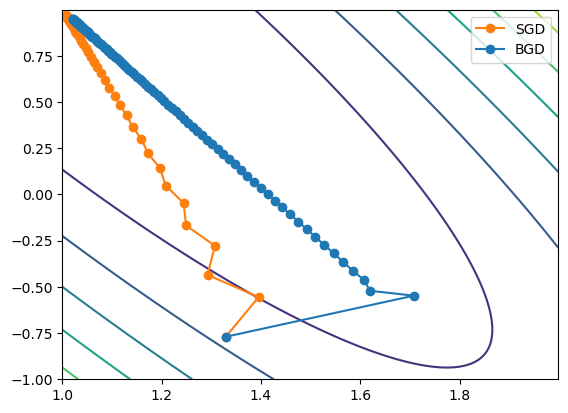

In [172]:
features = np.array([1, 3]).reshape(-1, 1)
features = np.concatenate((features, np.ones_like(features)), axis=1)

labels = np.array([2, 4]).reshape(-1, 1)

np.random.seed(24)
w = np.random.randn(2, 1)
# 随机梯度下降参数点运行轨迹
w_res = [np.copy(w)]

for i in range(40):
    w_res.append(np.copy(sgd_cal(features, w, labels, lr_gd, epoch=1, lr=0.1)))

np.random.seed(24)
w1 = np.random.randn(2, 1)
# 梯度下降参数点运行轨迹
w1, w_res_1 = w_cal_rec(features, w1, labels, gd_cal = lr_gd, lr = 0.1, itera_times = 100)

# 网格点坐标
x1, x2 = np.meshgrid(np.arange(1, 2, 0.001), np.arange(-1, 1, 0.001))
# 绘制等高线图
plt.contour(x1, x2, (2-x1-x2)**2+(4-3*x1-x2)**2)

# 绘制参数点移动轨迹图
plt.plot(np.array(w_res)[:, 0], np.array(w_res)[:, 1], '-o', color='#ff7f0e', label='SGD')
plt.plot(np.array(w_res_1)[:, 0], np.array(w_res_1)[:, 1], '-o', color='#1f77b4', label='BGD')
plt.legend(loc = 1)

### 小批量梯度下降

#### 计算流程

In [173]:
x = np.array([1, 3, 6, 8]).reshape(-1, 1)
y = np.array([2, 5, 4, 3]).reshape(-1, 1)

# batch_size = 2
x1 = x[:2]
x2 = x[2:4]
y1 = y[:2]
y2 = y[2:4]

In [174]:
w = 0
w = w_cal(x1, w, y1, lr_gd, lr = 0.02, itera_times = 1)
w = w_cal(x2, w, y2, lr_gd, lr = 0.02, itera_times = 1)
w

array([[0.62]])

In [178]:
def sgd_cal(X, w, y, gd_cal, epoch, batch_size=1, lr=0.02, shuffle=True, random_state=24):
    """
    随机梯度下降和小批量梯度下降计算函数
    :param X: 训练数据特征
    :param w: 初始参数取值
    :param y: 训练数据标签
    :param gd_cal：梯度计算公式
    :param epoch: 遍历数据集次数
    :batch_size: 每一个小批包含数据集的数量
    :param lr: 学习率
    :shuffle：是否在每个epoch开始前对数据集进行乱序处理
    :random_state：随机数种子值
    :return w：最终参数计算结果
    """
    m = X.shape[0]
    n = X.shape[1]
    batch_num = np.ceil(m / batch_size)
    X = np.copy(X)
    y = np.copy(y)
    for j in range(epoch):
        if shuffle:
            np.random.seed(random_state)
            np.random.shuffle(X)
            np.random.seed(random_state)
            np.random.shuffle(y)
        for i in range(np.int32(batch_num)):
            w = w_cal(X[i*batch_size: np.min([(i+1)*batch_size, m])],
                    w,
                    y[i*batch_size: np.min([(i+1)*batch_size, m])],
                    gd_cal=gd_cal,
                    lr=lr,
                    itera_times=1)
    return w

In [179]:
# 初始参数为0，两条数据为1批，迭代10轮epoch
w = 0
sgd_cal(x, w, y, lr_gd, epoch=10, batch_size=2, lr=0.02)

array([[0.67407761]])

In [180]:
# 梯度下降计算过程
w = 0
w_cal(x, w, y, lr_gd, lr = 0.02, itera_times = 10)

array([[0.59090909]])

In [181]:
w = 0
sgd_cal(x, w, y, lr_gd, epoch=10, batch_size=4, lr=0.02)

array([[0.59090909]])

In [182]:
w = 0
for j in range(10):
    for i in range(4):
        w = w_cal(x[i], w, y[i], lr_gd, lr = 0.002, itera_times = 1)
w

np.float64(0.5379624189411458)

In [183]:
w = 0
w = sgd_cal(x, w, y, lr_gd, epoch=10, batch_size=1, lr=0.002, shuffle=False)
w

array([[0.53796242]])